In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


(50000, 32, 32, 3)

In [6]:
classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train = y_train.reshape(-1,)

In [11]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
def plot_image(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

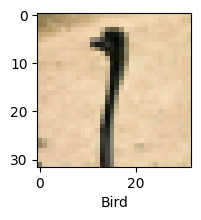

In [16]:
plot_image(X_train, y_train, 41)

In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(3000, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(10, activation="sigmoid"),
    ]
)

ann.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)

ann.fit(X_train, y_train, epochs = 5)

c:\Users\jrsak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 123ms/step - accuracy: 0.2733 - loss: 2.2240
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 129ms/step - accuracy: 0.3951 - loss: 1.6900
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 220s 141ms/step - accuracy: 0.4286 - loss: 1.5879
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 258s 165ms/step - accuracy: 0.4474 - loss: 1.5442
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 163ms/step - accuracy: 0.4583 - loss: 1.5120


In [22]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4666 - loss: 1.5190


[1.525786280632019, 0.4596000015735626]

In [23]:
from sklearn.metrics import classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1000
           1       0.52      0.66      0.58      1000
           2       0.37      0.34      0.35      1000
           3       0.28      0.46      0.35      1000
           4       0.49      0.29      0.36      1000
           5       0.46      0.27      0.34      1000
           6       0.44      0.57      0.50      1000
           7       0.64      0.38      0.47      1000
           8       0.58      0.58      0.58      1000
           9       0.52      0.49      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



### Very Low Accuracy using Artificial Neural Network

### Now We Use a Convolutional Neural Network

In [31]:
cnn = models.Sequential(
    [
        # cnn 1
        layers.Conv2D(
            filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)
        ),
        layers.MaxPooling2D((2, 2)),
        # cnn 2
        layers.Conv2D(
            filters=64, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)
        ),
        layers.MaxPooling2D((2, 2)),
        # dense
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

cnn.fit(X_train, y_train, epochs=5)

c:\Users\jrsak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.3669 - loss: 1.7382
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5923 - loss: 1.1562
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6467 - loss: 1.0181
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6800 - loss: 0.9208
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6987 - loss: 0.8629


In [32]:
cnn.evaluate(X_test, y_test)
#0.6443 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6864 - loss: 0.9176


[0.928945779800415, 0.6844000220298767]

In [33]:
y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print(classification_report(y_test, y_pred_classes_cnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1000
           1       0.83      0.78      0.80      1000
           2       0.60      0.56      0.58      1000
           3       0.59      0.37      0.45      1000
           4       0.61      0.65      0.63      1000
           5       0.56      0.68      0.62      1000
           6       0.69      0.84      0.76      1000
           7       0.83      0.64      0.72      1000
           8       0.67      0.87      0.76      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

